Project based for Detection/ Identification of Spam SMS.

In [1]:
# importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('spam.csv',encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3687,ham,I'll meet you in the lobby,NaN,NaN,NaN
4418,ham,How have your little darlings been so far this...,NaN,NaN,NaN
5277,ham,"Best msg: It's hard to be with a person, when ...",NaN,NaN,NaN
2334,ham,Do you like Italian food?,NaN,NaN,NaN
5432,ham,Thanx a lot 4 ur help!,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
## dropping last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)

In [6]:
df.sample

<bound method NDFrame.sample of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [7]:
## renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [8]:
## label encoding the 'ham' and 'spam' to 0 or 1 for better classification
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
## missing values check
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
## checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [12]:
#removing duplicates
df =df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(5169, 2)

Exploartory Data Analysis

In [14]:
df['Target'].value_counts()         # figuring out how much composition is the spam vs not spam collection


Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1eb618c1010>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

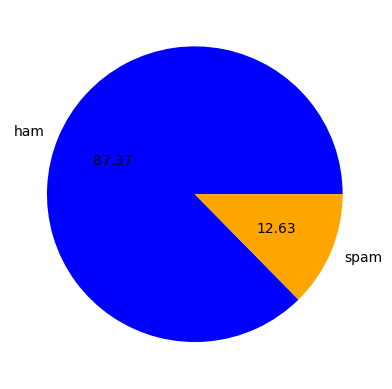

In [15]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f',colors=['blue','orange'])

Data is imbalanced as spam sms message is less than Not spam

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
## through the below code we will try to observe the length of each text in the message
df['num_characters'] = df['Text'].apply(len)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15448\3478008939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [19]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
import nltk

In [21]:
# Simple sentence counting without NLTK download requirement
def count_sentences_simple(text):
    if pd.isna(text):
        return 0
    # Count sentences based on sentence-ending punctuation
    import re
    sentence_pattern = r'[.!?]+(?:\s|$)'
    sentences = re.findall(sentence_pattern, str(text))
    return max(1, len(sentences)) if text.strip() else 0

# Add the sentence count column
df['num_sentences'] = df['Text'].apply(count_sentences_simple)

# Also add word count for more analysis
df['num_words'] = df['Text'].apply(lambda x: len(str(x).split()))

print("Text features added successfully!")
print(df[['Text', 'num_characters', 'num_sentences', 'num_words']].head())

Text features added successfully!
                                                Text  num_characters  \
0  Go until jurong point, crazy.. Available only ...             111   
1                      Ok lar... Joking wif u oni...              29   
2  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3  U dun say so early hor... U c already then say...              49   
4  Nah I don't think he goes to usf, he lives aro...              61   

   num_sentences  num_words  
0              3         20  
1              2          6  
2              1         28  
3              2         11  
4              1         13  


C:\Users\Asus\AppData\Local\Temp\ipykernel_15448\1874139558.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Text'].apply(count_sentences_simple)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15448\1874139558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x: len(str(x).split()))


In [22]:
df.head()

,Target,Text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,3,20
1,0,Ok lar... Joking wif u oni...,29,2,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28
3,0,U dun say so early hor... U c already then say...,49,2,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,13


In [23]:
df[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.830335,15.340685
std,58.236293,1.389103,11.068488
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,7.000000
50%,60.000000,1.000000,12.000000
75%,117.000000,2.000000,22.000000
max,910.000000,39.000000,171.000000


In [24]:
# ham messages case:
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.749557
std,56.358207,11.116240,1.367050
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [25]:
# spam message analysis
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.388974
std,30.137753,5.967672,1.412695
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,1.000000
50%,149.000000,25.000000,2.000000
75%,157.000000,28.000000,3.000000
max,224.000000,35.000000,8.000000


<Axes: xlabel='num_characters', ylabel='Count'>

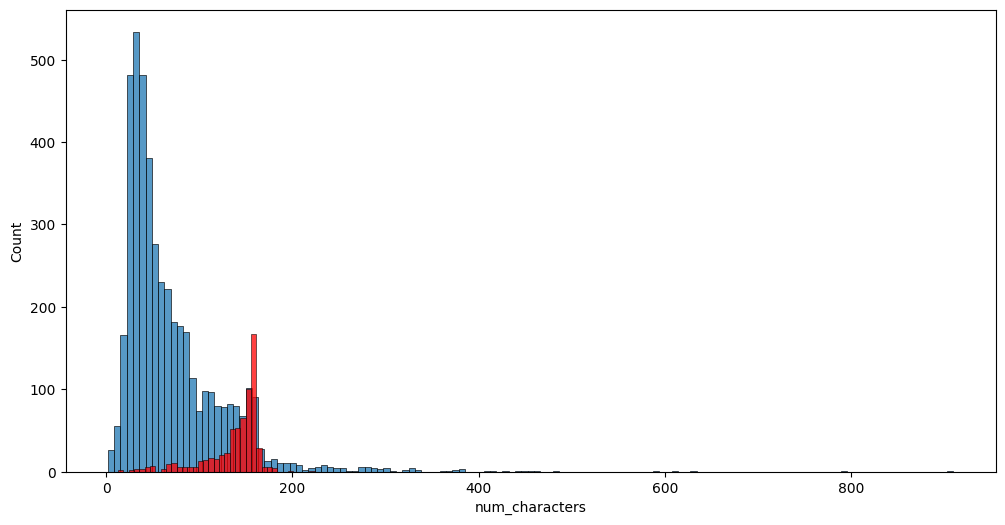

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

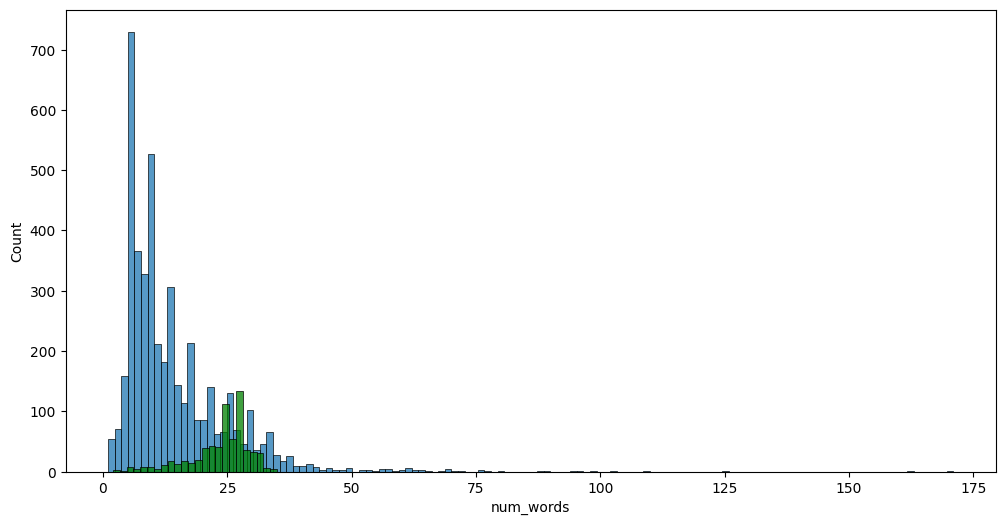

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='green')

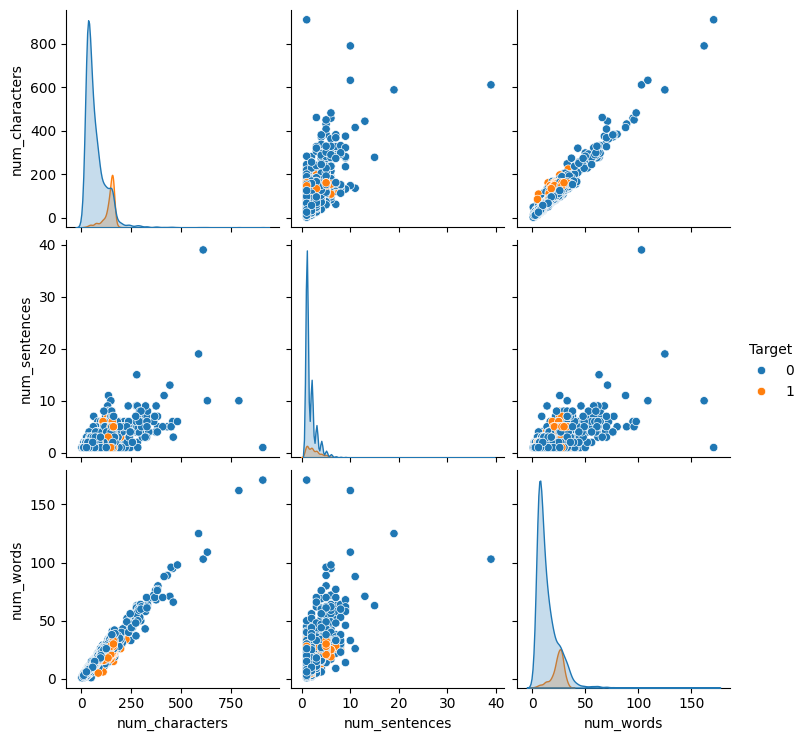

In [28]:
sns.pairplot(df,hue='Target')

<Axes: >

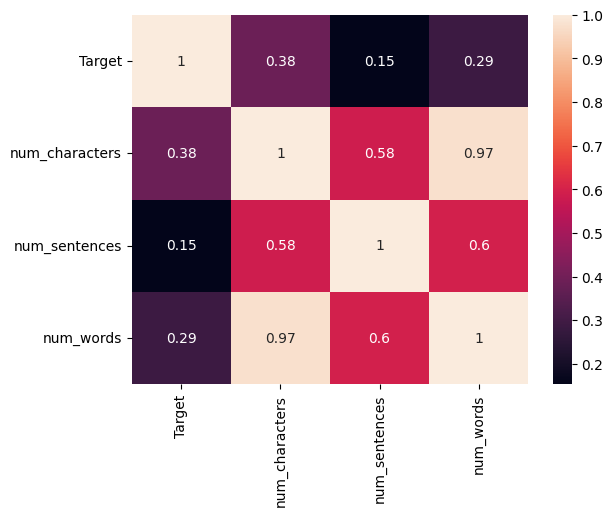

In [29]:
# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)

3. Data Preprocessing-->
    Lower Case,
    Tokenization,
    Removing special characters,
    Removing stop words and punctuation,
    Stemming.

In [30]:
import nltk

# Add the directory where NLTK data was downloaded to the search path
nltk.data.path.append(r'C:\Users\Asus\AppData\Roaming\nltk_data')

# Download the 'punkt' and 'punkt_tab' resources if not already present
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
   

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [35]:
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

# testing through a random sentence
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [36]:
df['Text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [37]:
## steming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('Running')

'run'

In [38]:
# creating a new column 'transformed_text' from 'Text' column and applying transform_text function to each row of the column
df['transformed_text'] = df['Text'].apply(transform_text)
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15448\3953337907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['Text'].apply(transform_text)


,Target,Text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,3,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,2,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,13,nah think goe usf live around though


In [ ]:
# creating a wordCloud to mark the important words in the ham and spam SMS
%pip install wordcloud
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

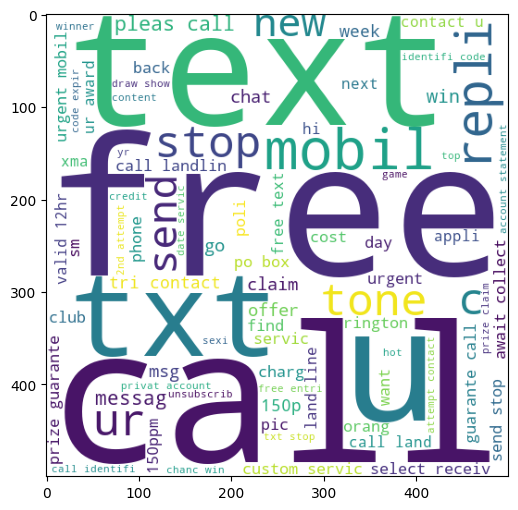

In [52]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
# these are the most common words underlying in the spam messages or the most frequent used words

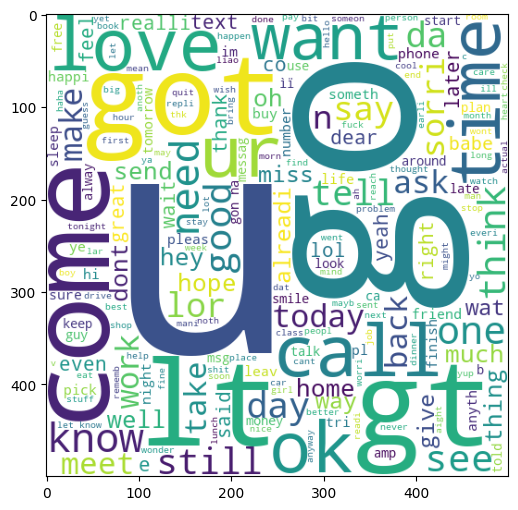

In [54]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
## top 30 words used in both spam messages
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)


In [59]:
len(spam_corpus)

9939

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

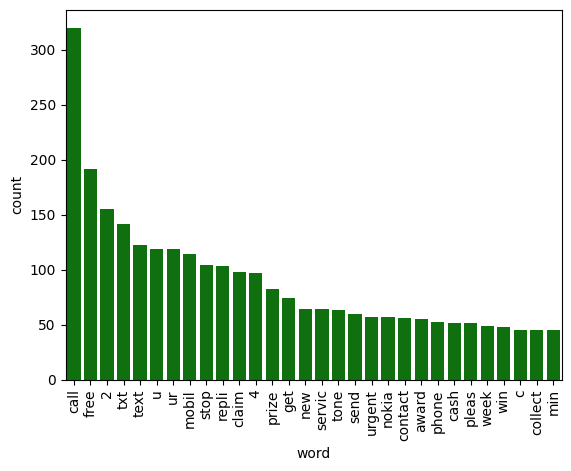

In [66]:
# importing Counter which would define how much time the specific words appear in the list
from collections import Counter
top_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_spam_words, color='green')
plt.xticks(rotation='vertical')

In [67]:
# analysis of the top 30 words used in the ham type messages
ham_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [68]:
len(ham_corpus)

9939

Model Building
CounterVectorizer which is the Bag Of Words
TF-TDF vertcorizer

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)      # seelcting the top 3000 freq words

In [108]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [120]:
X.shape
# output would be as (messages, words)

(5169, 3000)

In [110]:
y = df['Target'].values

In [111]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)


In [113]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [114]:
# prediction with Gaussian based model and accuracy score:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [115]:
# prediction with respect to MultiNominal()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [116]:
# prediction with repect to bernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Second Drive we tested the TF-IDF instead of CountVerctorizer and the MultiNomial type model is performing well with the precision score of 100% so here choosing TF-IDF would be better as the dataset is imbalanced and precison matter most in this case here.

In [121]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))